<a href="https://colab.research.google.com/github/johnnysDeu/Thesis/blob/main/PreTrained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=jztwpsIzEGc

Building a CNN from scratch with any image dataset

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [1]:
#!pip install "tensorflow<2.11"

In [2]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [3]:
#!pip install torchvision

In [4]:

#!pip list
import torch

In [5]:
#!nvidia-smi

In [6]:
#!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [7]:
# add headings with ##(space) on the markdowns

In [8]:
#!pip install tensorflor keras

In [9]:
import tensorflow as tf
import os

In [10]:
!nvidia-smi

Mon Jun  3 19:25:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.67                 Driver Version: 536.67       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 ...  WDDM  | 00000000:2D:00.0  On |                  N/A |
|  0%   48C    P8              17W / 125W |   1068MiB /  6144MiB |     29%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [11]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [13]:
#! nvidia-smi

In [14]:
#!pip install opencv-python

## Imports

In [15]:
import tensorflow as tf
import os
import cv2
import imghdr

In [16]:
#from google.colab import drive
#drive.mount('/content/drive')

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
#Current_dir = os.getcwd()
#Current_dir

In [19]:
#path = '/content/drive/MyDrive/Colab Notebooks/Thesis/data'
#os.chdir(path)

In [20]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [21]:
base_dir = r"C:\Users\YannisPC\PycharmProjects\Thesis\Thesis\READY_BALANCED_SAME_SIZE_Random_Split"

In [22]:
data=tf.keras.utils.image_dataset_from_directory(base_dir, batch_size=32, image_size=(224,224))
#data=tf.keras.utils.image_dataset_from_directory('data_medium', batch_size=32, image_size=(150,150))

Found 34600 files belonging to 3 classes.


# Split Data

In [23]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [24]:
train_Ads_dir = os.path.join(train_dir, 'Ads')
train_sample_dir = os.path.join(train_dir, 'Sample')
train_Ads_dir

'C:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis\\READY_BALANCED_SAME_SIZE_Random_Split\\train\\Ads'

In [25]:
validation_Ads_dir = os.path.join(validation_dir, 'Ads')
validation_sample_dir = os.path.join(validation_dir, 'Sample')
validation_Ads_dir


'C:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis\\READY_BALANCED_SAME_SIZE_Random_Split\\validation\\Ads'

In [26]:
test_Ads_dir = os.path.join(test_dir, 'Ads')
test_sample_dir = os.path.join(test_dir, 'Sample')
test_Ads_dir

'C:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis\\READY_BALANCED_SAME_SIZE_Random_Split\\test\\Ads'

In [27]:
print('total training Ads images:', len(os.listdir(train_Ads_dir)))

total training Ads images: 10500


In [28]:
print('total training sample images:', len(os.listdir(train_sample_dir)))

total training sample images: 10500


In [29]:
print('total validation Ads images:', len(os.listdir(validation_Ads_dir)))

total validation Ads images: 3650


In [30]:
print('total validation sample images:', len(os.listdir(validation_sample_dir)))

total validation sample images: 3950


In [31]:
print('total test Ads images:', len(os.listdir(test_Ads_dir)))

total test Ads images: 3000


In [32]:
print('total test sample images:', len(os.listdir(test_sample_dir)))

total test sample images: 3000


## Using data augmentation/ datagen

In [33]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


# train_datagen = ImageDataGenerator(
#     rescale=1./255)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=32, #32
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

Found 21000 images belonging to 2 classes.
Found 7600 images belonging to 2 classes.


## Pretrained Model Inception

In [34]:
import keras
from keras.models import load_model


# Appling a Pre-trained CNN on our Dataset for comparison

The MobileNet model




In [36]:
from keras.applications import MobileNet

conv_base = MobileNet(weights='imagenet',
                 include_top=False,
                 input_shape=(224, 224, 3))

In [37]:
conv_base.summary()


Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

We will add a dense layer after our conv_base NN

In [38]:
from keras import models
from keras import layers

modelPreTMob = models.Sequential()
modelPreTMob.add(conv_base)

modelPreTMob.add(layers.Flatten())
modelPreTMob.add(layers.Dense(256, activation='relu'))
modelPreTMob.add(layers.Dropout(0.5))
modelPreTMob.add(layers.Dense(1, activation='sigmoid'))

In [39]:
modelPreTMob.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 256)               12845312  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,074,433
Trainable params: 16,052,545
Non-trainable params: 21,888
_______________________________________

In [40]:
class TrainingConfig:
    BATCH_SIZE:       int   = 64
    EPOCHS:           int   = 101
    LEARNING_RATE:    float = 0.0001
    DROPOUT:          float = 0.5
    LAYERS_FINE_TUNE: int   = 8    

In [41]:
# Specify the number of layers to fine tune at the end of the convolutional base.
num_layers_fine_tune = TrainingConfig.LAYERS_FINE_TUNE
num_layers = len(conv_base.layers)

In [42]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(modelPreTMob.trainable_weights))

This is the number of trainable weights before freezing the conv base: 85


In [43]:
# Freeze the initial layers in the convolutional base.
for model_layer in conv_base.layers[:num_layers - num_layers_fine_tune]:
    print(f"FREEZING LAYER: {model_layer}")
    model_layer.trainable = False

FREEZING LAYER: <keras.engine.input_layer.InputLayer object at 0x0000023CFE960D90>
FREEZING LAYER: <keras.layers.convolutional.conv2d.Conv2D object at 0x0000023E1ABD73A0>
FREEZING LAYER: <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000023E1ABD71F0>
FREEZING LAYER: <keras.layers.activation.relu.ReLU object at 0x0000023E1ABD7490>
FREEZING LAYER: <keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x0000023E1ABD1C10>
FREEZING LAYER: <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000023E1ABDAFA0>
FREEZING LAYER: <keras.layers.activation.relu.ReLU object at 0x0000023E1ABDA490>
FREEZING LAYER: <keras.layers.convolutional.conv2d.Conv2D object at 0x0000023E1AB96340>
FREEZING LAYER: <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000023E1AB6FD30>
FREEZING LAYER: <keras.layers.activation.relu.ReLU object at 0x0000023E1AB6FCA0>
FREEZING LAYER: <keras.layers.reshaping.zero_padding

In [40]:
#conv_base.trainable = False

In [44]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(modelPreTMob.trainable_weights))

This is the number of trainable weights after freezing the conv base: 12


In [45]:
modelPreTMob.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 256)               12845312  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,074,433
Trainable params: 13,909,505
Non-trainable params: 2,164,928
____________________________________

In [46]:
modelPreTMob.compile('Adagrad', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])# Adagrad, adam

In [47]:
histPreT = modelPreTMob.fit(train_generator, epochs=50, validation_data=validation_generator) #  epochs 10 are over fitting. early stop at?

Epoch 1/30
657/657 [==============================] - 68s 97ms/step - loss: 0.3669 - accuracy: 0.8500 - val_loss: 0.2661 - val_accuracy: 0.8916
Epoch 2/30
657/657 [==============================] - 36s 55ms/step - loss: 0.2341 - accuracy: 0.9071 - val_loss: 0.2557 - val_accuracy: 0.8968
Epoch 3/30
657/657 [==============================] - 36s 55ms/step - loss: 0.1765 - accuracy: 0.9321 - val_loss: 0.2502 - val_accuracy: 0.9008
Epoch 4/30
657/657 [==============================] - 36s 54ms/step - loss: 0.1340 - accuracy: 0.9501 - val_loss: 0.2509 - val_accuracy: 0.9053
Epoch 5/30
657/657 [==============================] - 36s 54ms/step - loss: 0.0989 - accuracy: 0.9644 - val_loss: 0.2543 - val_accuracy: 0.9074
Epoch 6/30
657/657 [==============================] - 35s 53ms/step - loss: 0.0807 - accuracy: 0.9731 - val_loss: 0.2596 - val_accuracy: 0.9061
Epoch 7/30
657/657 [==============================] - 35s 54ms/step - loss: 0.0637 - accuracy: 0.9801 - val_loss: 0.2647 - val_accuracy:

In [48]:
modelPreTMob.save(os.path.join('models/Latest','Pretrained_MobileNet_ad_class_with_Aug_FT8.h5'))

In [49]:
START_PLOT_FROM_EPOCH= 1

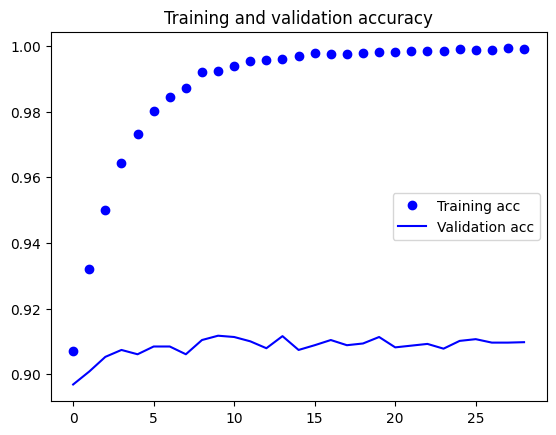

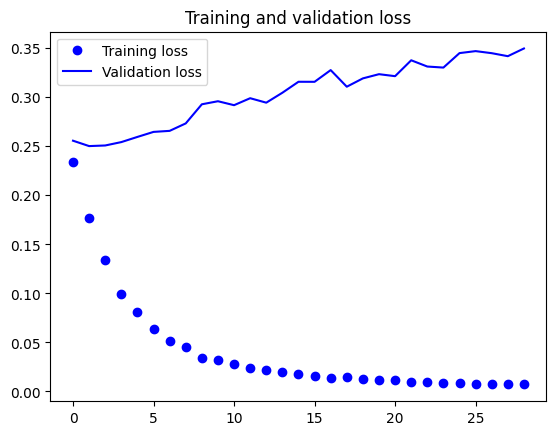

In [50]:
acc = histPreT.history['accuracy'][START_PLOT_FROM_EPOCH:]
val_acc = histPreT.history['val_accuracy'][START_PLOT_FROM_EPOCH:]
loss = histPreT.history['loss'][START_PLOT_FROM_EPOCH:]
val_loss = histPreT.history['val_loss'][START_PLOT_FROM_EPOCH:]

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [52]:
val_acc_per_epoch = histPreT.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 11


## Evaluate

In [53]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [54]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

test_loss, test_acc = modelPreTMob.evaluate(test_generator, steps=len(test_generator))  # steps_per_epoch * epochs
print('test acc:', test_acc)
print('test loss:', test_loss)


Found 6000 images belonging to 2 classes.
188/188 [==============================] - 7s 36ms/step - loss: 0.3565 - accuracy: 0.9073
test acc: 0.9073333144187927
test loss: 0.3564816415309906


In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize lists to collect true labels and predictions
true_labels = []
predicted_labels = []

In [56]:
for _ in range(len(test_generator)):
    X, y = next(test_generator)

    yhat = modelPreTMob.predict(X)
    
    y_true_batch = y # Labels
    
    # Convert probabilities to class labels using a threshold of 0.5
    y_pred_batch = (yhat > 0.5).astype(int)

    # Append the true labels and predictions for this batch to the lists
    true_labels.extend(y_true_batch)
    predicted_labels.extend(y_pred_batch)

    if len(true_labels) >= test_generator.n:
        break

1/1 [==============================] - 0s 386ms/step


In [57]:
# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

In [58]:
# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

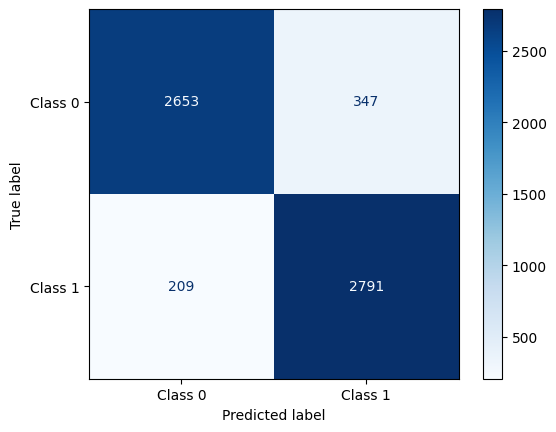

In [59]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()